# Chapter_5:

>* A support vector machine (SVM) is a powerful and versatile machine learning model for performing linear or nonlinear **classification**, **regression**, and even **novelty detection**.
>* It is good for small and intermediate-size datasets, But **it scales poorly with large datasets**.
>* The algorithm implements the idea of Large Margin ... Using `support vectors`"poits of the two classes that determines the width of the marigin". 
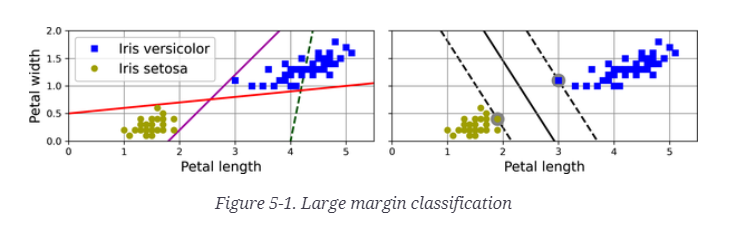

>* 🚫 SVM is sensitive to feature scales, therefore don't froget to use `StandardScaler` or other Scalers before fitting the algorithm ... The following images defiens the difference:

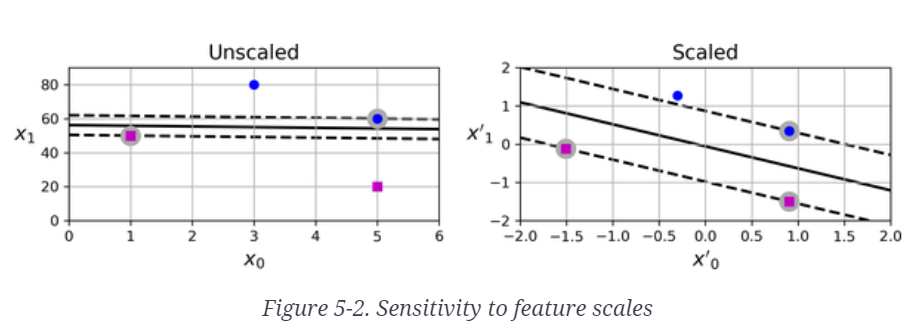

 

>* There are two types of using Large Marigin: (Hard Marigin & Soft Marigin).
>* If we impose that no instances is located in the street, then we use `Hard Marigin`. This has two disadvantages:
>>1. The data must be linearly separable. (Therefore in the left image, we can use HardMarigin)
>>2. This Hard Marigin is sensitive to outliners. (Therefore in the right image, our marigin shouldn't be there because the grean support vector is anoutlier of the green group):
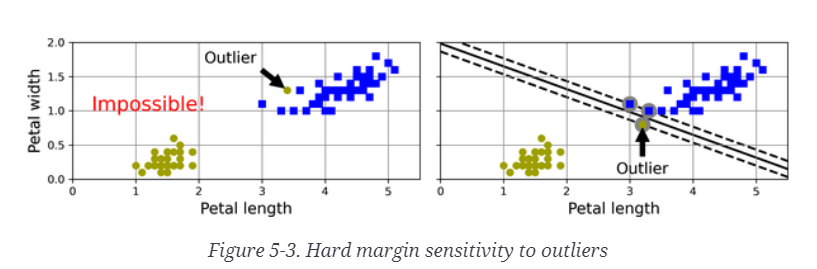
>* to find a good balance between keeping the street as large as possible and limiting the margin violations (i.e., instances that end up in the middle of the street or even on the wrong side). This is called `soft margin` classification.


>* Using Sckit Learn SVM model, there is a regularization parameter called `C`.
>* As you increase it, your street get more strict to contain any instances.
>* The opposite occurs as you reduce it:
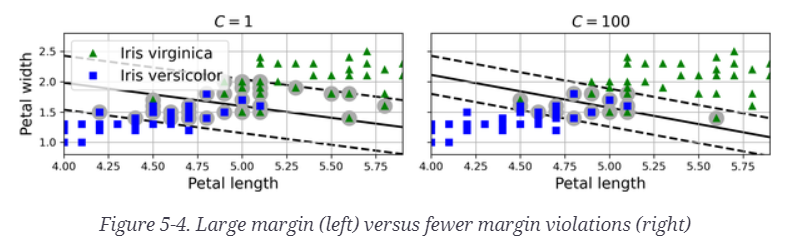
>* If your SVM model is `overfitting`, you can **try regularizing it by reducing `C`.**

In [1]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)  # Iris virginica

svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, random_state=42))
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [17]:
X_new = [[4.8,1.7],[5.0,1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [18]:
svm_clf.decision_function(X_new)

array([ 0.05607001, -0.22036063])

> Via `decision_function` **LinearSVC** determines its prediction, it measures the signed distance between the instance and the decision boundary.
>* If it is -ve, then the class is False, +ve means class is True
>
> In **Logistic Regression**, this is done via `predict_proba()`. If the prediction is greater than the threshold, then the class is True, if it is lowe than the threshold then the class is False. 

May be important:
>if you use the **`SVC`** class instead of **`LinearSVC`**, and if you set its `probability` hyperparameter to `True`, then the model will fit an extra model at the end of training to map the SVM decision function scores to estimated probabilities. Under the hood, this requires using 5-fold cross-validation to generate out-of-sample predictions for every instance in the training set, then training a **`LogisticRegression`** model, so it will slow down training considerably. After that, the `predict_proba()` and `predict_log_proba()` methods will be available.    
________________

The difference between
`from sklearn.svm import LinearSVC` & `from sklearn.svm import SVC` is that: 
>* `SVC` & `SVR` use what is called <font color = 'red'>**kernel trick**</font> (discussed later). Those kernel trick enables you to fit Linear and Non-Linear data via kernels. Unlike `LinearSVC` that fits only linear data.
>* `SVC` & `SVR` has more kernels like:
>>* kernel= `{'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}`, default=`'rbf'`
>>* hyperparameter `coef0 `is effective only if we used `poly` or `sigmoid` kernels ... determines how the model is affected by either high degree or low degree of polynomial.
>>* hyperparameter `degree` is used with `poly` kernel to determine the degree of the polynomial

> This illustrates the idea of why  we need to transform our data in a plane with more features to separate them here x2 = (x1^2):
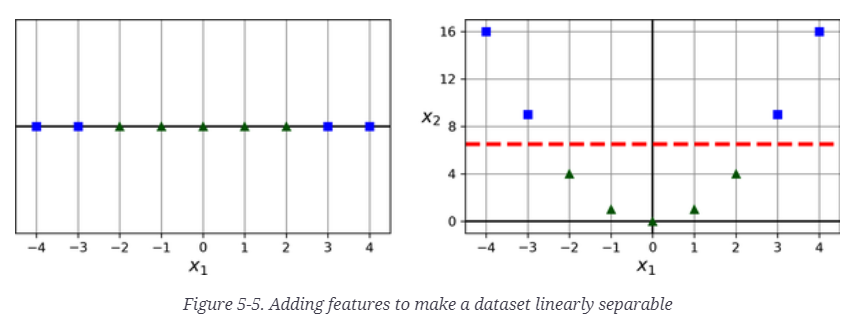
___________________

>* Note: we can use `PolynomialFeatures` with `LinearSVC` and fit nonlinear_data ... but in this case we make explosion to our features (making the model to slow) especially if our polynomial was of higher degree and don't benefit from the Kernel Trick idea in `SVC` or `SVR`. The idea to its majic in doing the same effect of adding polynomial features but without actually adding them. Therefore we end up not exploding the number of our features.

>* Below is the two methods with code:

In [21]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, random_state=42)
)
polynomial_svm_clf.fit(X, y)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

In [22]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel="poly", degree=3, coef0=1, C=5))
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

>* If your model is overfitting reduce `degree` and vice-versa if it is underfitting. Also tune the `C` hyperparameter.
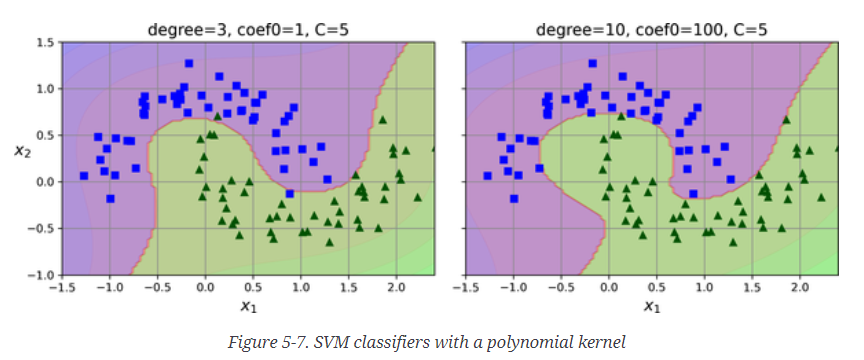

______________
>* `LinearSVC(C=100,random_state=22)` is equivalent to `SVC(kernel = 'linear', C=100, random_state =22)`. but the latter uses kernel trick.

>* To understand more the similarity function and `rbf kernel` [**WATCH THIS**](https://www.youtube.com/watch?v=-Gsifd-yf7E)


How we determine the similarity features:
>* Here we use similarity features function by making two landmarks with their gaussian to have two features.
>* Then we transfer our feature into the new features to make them separable.
>* The similarity feature here is `rbf`, we do it by:
>>* creating n-landmarks.
>>* for each landmark, we measure the distance between the m-instances and this landmark ... Then put this difference in the gaussian equation to have new vector. This vector is the rbf corresponds to this landmark.
>>* by this, we create one feature.
>>* we do this for all n-landmarks to have n-features.

In practice, if we have m-instances, we choose our landmarks to be m-landmarks. (but this is computationally bad even if the data is large.)

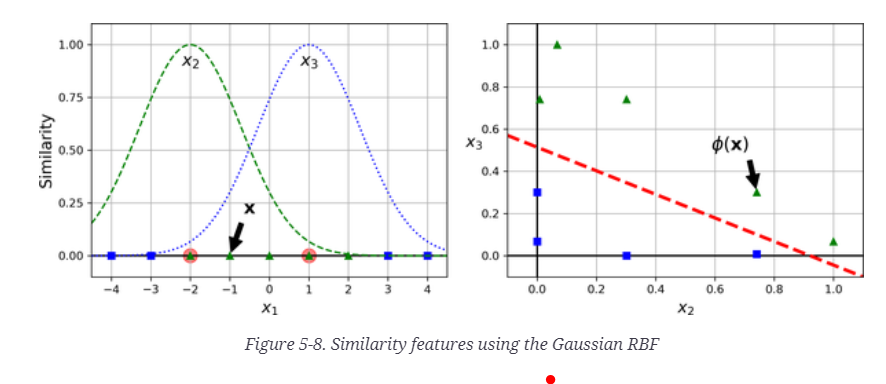

>* Just like the polynomial features method, the similarity features method can be useful with any machine learning algorithm, but it may be computationally expensive to compute all the additional features (especially on large training sets). Once again the kernel trick does its SVM magic, making it possible to obtain a similar result as if you had added many similarity features, but without actually doing so. Let’s try the `SVC` class with the Gaussian **RBF kernel**:

In [25]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel="rbf", gamma=5, C=0.001))
rbf_kernel_svm_clf.fit(X, y)

# gamma is for the gaussian width, low gamma means wide gaussian (less prone to overfiting). High gamma means narrow Gaussian.

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

> 8 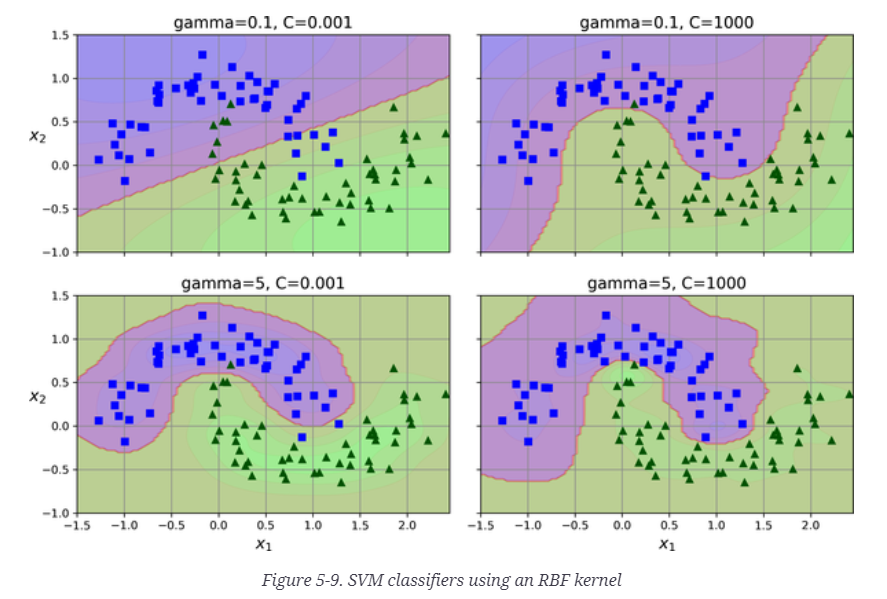
________________________

> Note the difference between `SGDClassifier()` and `LinearSVC`:
9 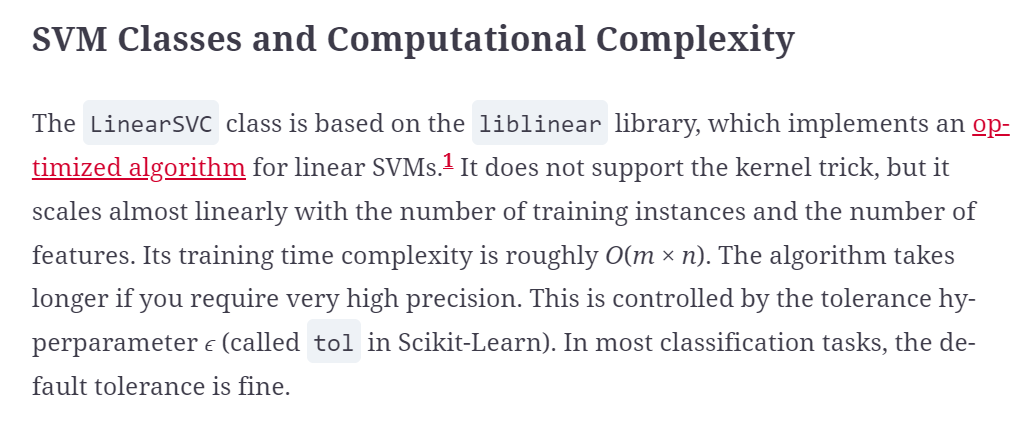
10 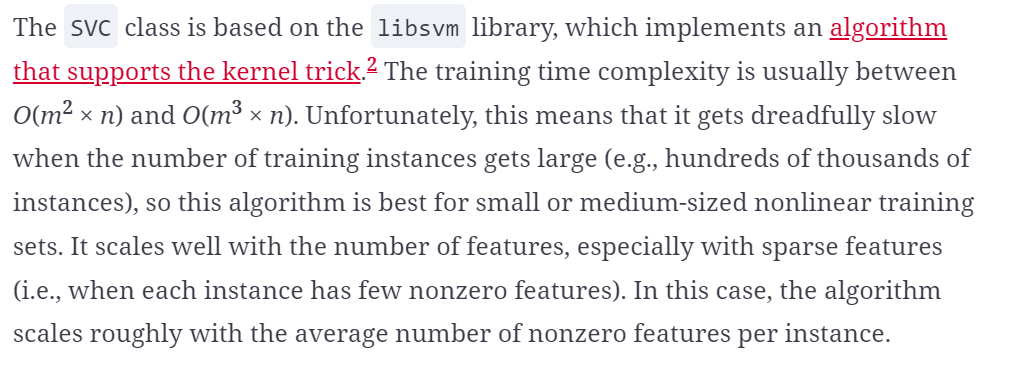
11 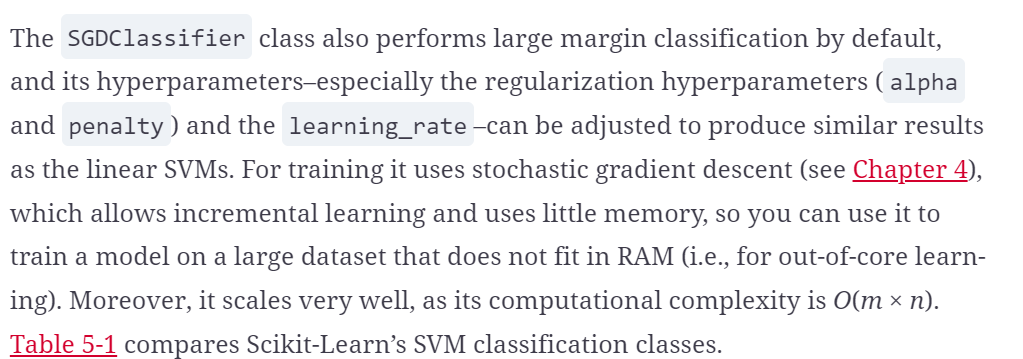
12 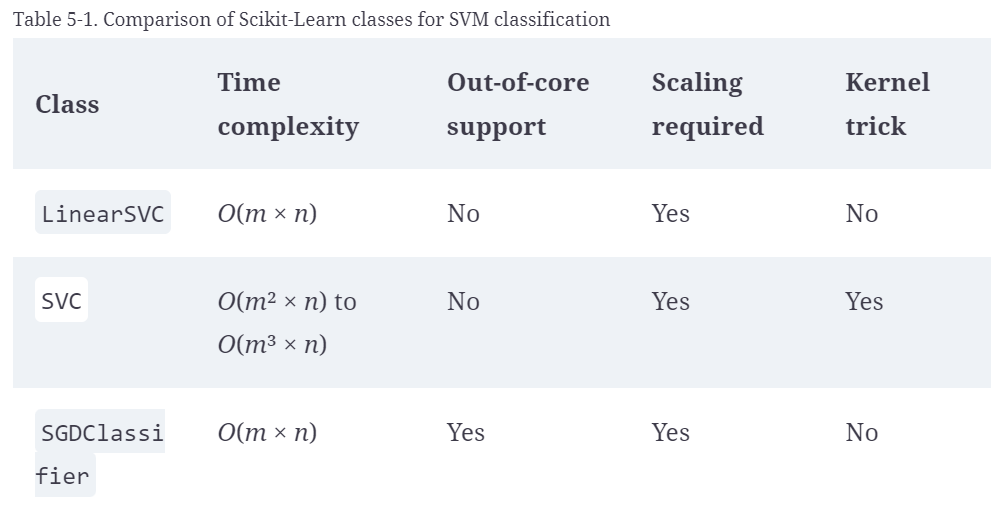
_____________________

### SVM Vs NeuralNets Vs LogisticRegression
>* We tend to use `neural-networks` due to:
>>* Its high computations in training than `SVM`.
>>* Neural-Networks suffers from the problem of local-optimum but SVM optimization or Logistic-Regression optimization is convex and doesn't suffer from local-optimum problems.
>*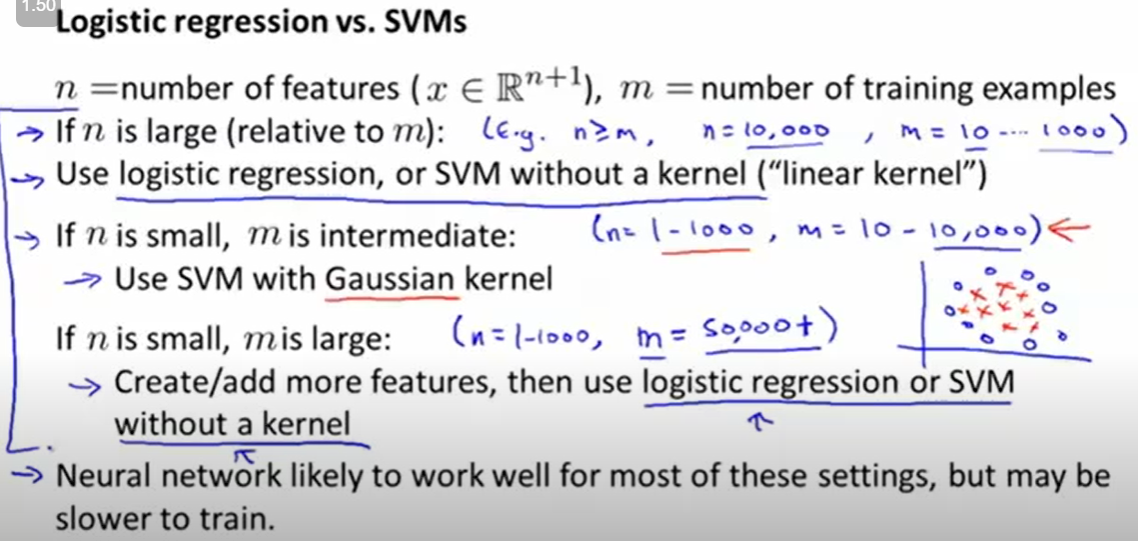
_____________________

### SVM Regression:

>* SVM can be used for regression and the idea (unlike SVM Classification) is to fit as many instances as possible on the street while limiting margin violations (i.e., instances off the street).
>* The width of the street is controlled by a hyperparameter, ϵ. The image shows two linear SVM regression models trained on some linear data, one with a small margin (ϵ = 0.5) and the other with a larger margin (ϵ = 1.2).
> 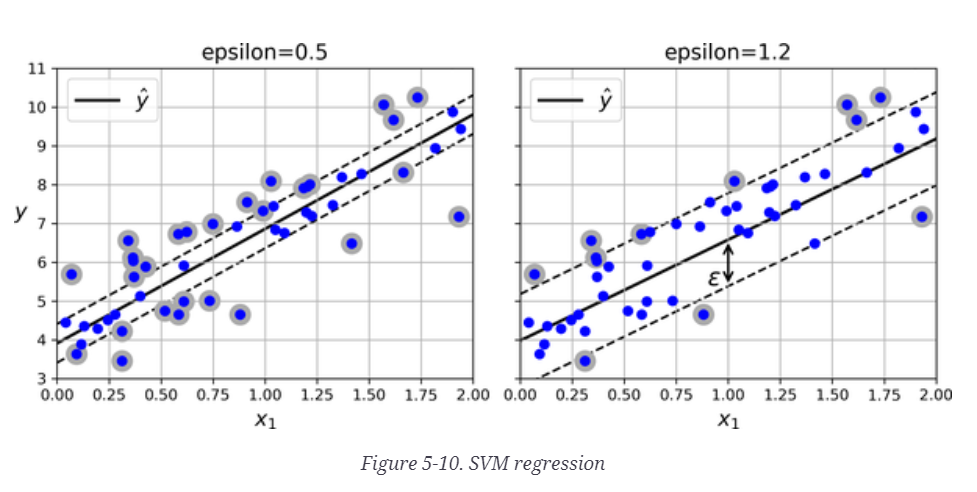
>* This is if we have non-linear datasets:
> 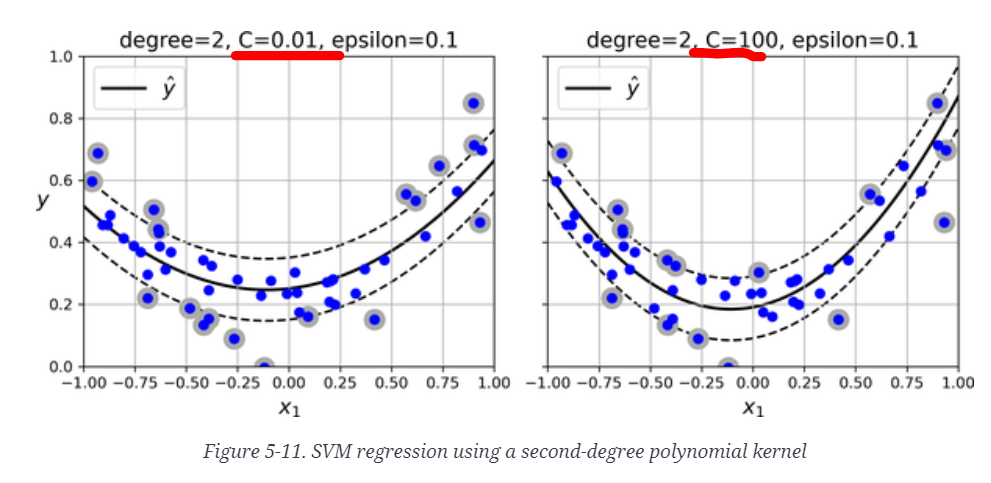

In [33]:
'''
from sklearn.svm import LinearSVR

X, y = [...]  # a linear dataset
svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon=0.5, random_state=42))
svm_reg.fit(X, y)
'''

# Or using kernelized SVR:

'''
from sklearn.svm import SVR

X, y = [...]  # a quadratic dataset
svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))
svm_poly_reg.fit(X, y)
''';

>* The `SVR` class is the regression equivalent of the `SVC` class, and the LinearSVR class is the regression equivalent of the `LinearSVC` class. 
>* The `LinearSVR` class scales linearly with the size of the training set (just like the `LinearSVC` class), while the `SVR` class gets much too slow when the training set grows very large (just like the `SVC` class).

### For Mathematics behind training the SupportVectorMachine:

>* Andrew Explanation. [**HERE**](https://www.youtube.com/watch?v=doN5SexZjto&t=4921s)
>* MIT Mathematical Idea of minmizing `0.5 ||w||^2` & introducing the idea of kernel trick [**HERE**](https://www.youtube.com/watch?v=_PwhiWxHK8o)
>* Some Sources for how LinearSVC is optimized [**HERE**](https://www.csie.ntu.edu.tw/~cjlin/papers/cddual.pdf)
>* Some Sources for how `SVC` with kernel tricks is optimized [**HERE**](https://www.microsoft.com/en-us/research/publication/sequential-minimal-optimization-a-fast-algorithm-for-training-support-vector-machines/)

_______________________________